<div class="alert alert-block alert-warning">
    Purpose: Take a quick look of halle_urban_atlas_2012.tiff and dem_dtm_heights.tiff
</div>

# QUICK INSPECTION OF INPUT RASTER LAYERS

In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import rioxarray as rxr

In [2]:
def plot(ds, title):
    fig, ax = plt.subplots(figsize=(12, 10))
    ds.plot(ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Longitude [deg]')
    ax.set_ylabel('Latitude [deg]')
    
def get_mask(ds, nan=65535):
    return ds.data == nan

def get_masked_data(ds, nan=65535):
    mask = get_mask(ds, nan)
    return ds.where(~mask)

In [3]:
atlastiff = 'halle_urban_atlas_2012.tiff'
geoclimatetiff = 'geoclimate_heights.tiff'

In [4]:
atlas = rxr.open_rasterio(atlastiff)
geoclimate = rxr.open_rasterio(geoclimatetiff)
nan = 65535

## Atlas dataset

In [5]:
atlas

<xarray.DataArray (band: 1, y: 1466, x: 1575)>
[2308950 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.45e+06 4.45e+06 4.45e+06 ... 4.466e+06 4.466e+06
  * y            (y) float64 3.16e+06 3.16e+06 3.16e+06 ... 3.146e+06 3.146e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     65535
    scale_factor:   1.0
    add_offset:     0.0

In [6]:
atlas.dtype, atlas.shape

(dtype('uint16'), (1, 1466, 1575))

## Geoclimate dataset

In [7]:
geoclimate

<xarray.DataArray (band: 1, y: 1367, x: 1526)>
[2086042 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.451e+06 4.451e+06 ... 4.466e+06 4.466e+06
  * y            (y) float64 3.16e+06 3.16e+06 3.16e+06 ... 3.146e+06 3.146e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    long_name:      HEIGHT_WALL
    name:           HEIGHT_WALL
    _FillValue:     65535.0
    scale_factor:   1.0
    add_offset:     0.0

In [8]:
geoclimate.dtype, geoclimate.shape

(dtype('float64'), (1, 1367, 1526))

<font color=red> **REMARK:** The dtypes and shapes of the two raster layers are different</font>

## Masking the data for NaNs

In [9]:
maskedatlas = get_masked_data(atlas)
maskedgeoclimate = get_masked_data(geoclimate)

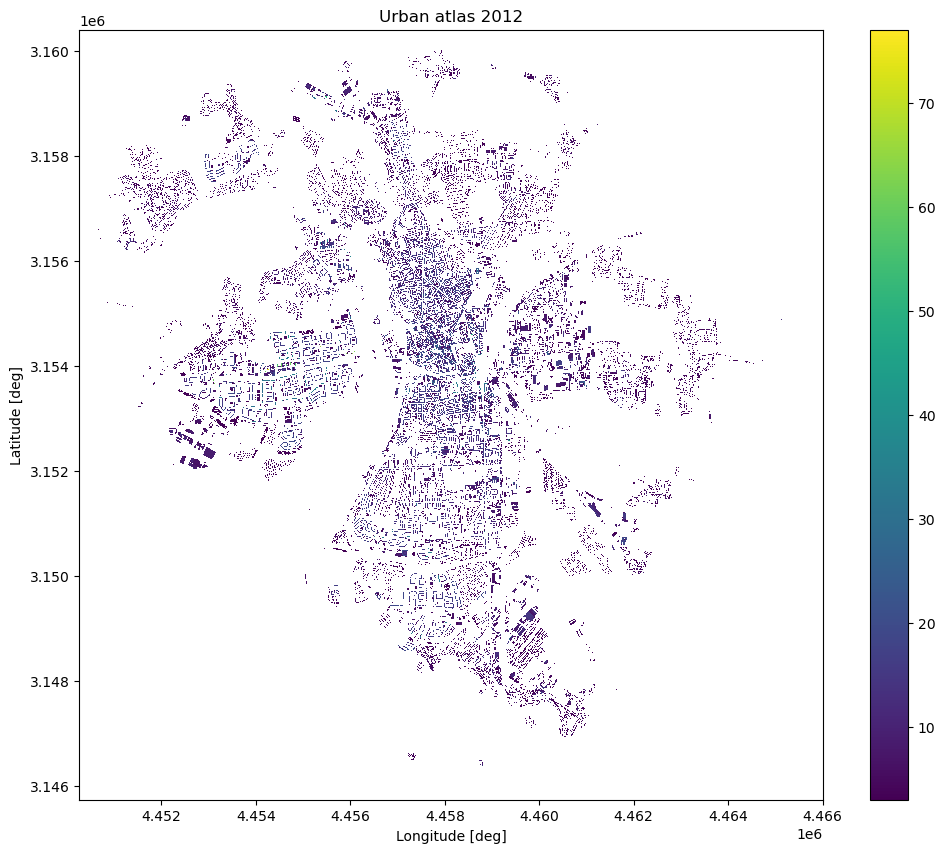

In [10]:
plot(maskedatlas, 'Urban atlas 2012')

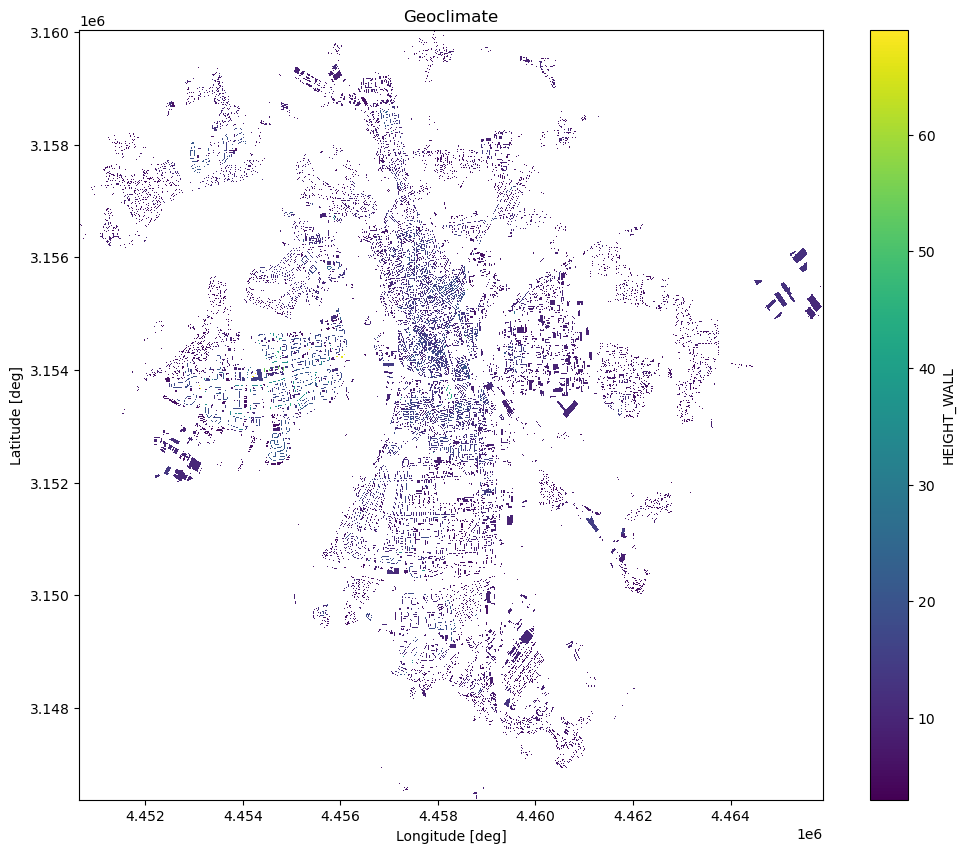

In [11]:
plot(maskedgeoclimate, 'Geoclimate')

<font color=red> **REMARK:** The extend of the raster layers is different</font>